In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from collections import OrderedDict  #保持Key的顺序
from datetime import datetime,date,timedelta
import matplotlib.pyplot as plt # 画图用
import pickle  # 打包

plt.style.use('ggplot')  # 设置图表风格
import warnings  
warnings.filterwarnings('ignore') 



In [3]:
pkl_file = open('factor.pkl', 'rb')
mom_factor = pd.read_pickle(pkl_file)
pkl_file.close()
mom_factor

{'10D':                          returns      risk  momentum
 date       codes                                    
 2022-01-04 000001.XSHE  0.993034  0.025034 -0.887088
            000002.XSHE  0.965046  0.025034 -0.915076
            000006.XSHE  1.270476  0.025034 -0.609646
            000007.XSHE  0.963145  0.025034 -0.916977
            000008.XSHE  0.954545  0.025034 -0.925577
 ...                          ...       ...       ...
 2022-12-30 605580.XSHG  0.973841  0.025034 -0.906282
            605588.XSHG  0.927267  0.025034 -0.952856
            605589.XSHG  0.948752  0.025034 -0.931370
            605598.XSHG  0.879886  0.025034 -1.000237
            605599.XSHG  1.023631  0.025034 -0.856492
 
 [732776 rows x 3 columns],
 '5D':                          returns      risk  momentum
 date       codes                                    
 2022-01-04 000001.XSHE  1.019873  0.025308 -0.901605
            000002.XSHE  0.993255  0.025308 -0.928223
            000006.XSHE  1.212727  0.02

In [10]:
factor_5D=mom_factor['5D']['momentum']
factor_10D=mom_factor['10D']['momentum']

In [13]:
factor_5D=factor_5D.reset_index()
factor_5D.head()

,date,codes,momentum
0,2022-01-04,000001.XSHE,-0.901605
1,2022-01-04,000002.XSHE,-0.928223
2,2022-01-04,000006.XSHE,-0.708750
3,2022-01-04,000007.XSHE,-0.948773
4,2022-01-04,000008.XSHE,-0.930061


In [16]:
factor_10D=factor_10D.reset_index()
factor_10D.head()

,index,date,codes,momentum
0,0,2022-01-04,000001.XSHE,-0.887088
1,1,2022-01-04,000002.XSHE,-0.915076
2,2,2022-01-04,000006.XSHE,-0.609646
3,3,2022-01-04,000007.XSHE,-0.916977
4,4,2022-01-04,000008.XSHE,-0.925577


In [15]:
df=pd.merge(factor_10D,factor_5D,on=['date','codes'],how='inner')
df.head()

,date,codes,momentum_x,momentum_y
0,2022-01-04,000001.XSHE,-0.887088,-0.901605
1,2022-01-04,000002.XSHE,-0.915076,-0.928223
2,2022-01-04,000006.XSHE,-0.609646,-0.708750
3,2022-01-04,000007.XSHE,-0.916977,-0.948773
4,2022-01-04,000008.XSHE,-0.925577,-0.930061


In [17]:
df.set_index(['date','codes'],inplace=True)
df.head()

momentum_x  momentum_y
date       codes                              
2022-01-04 000001.XSHE   -0.887088   -0.901605
           000002.XSHE   -0.915076   -0.928223
           000006.XSHE   -0.609646   -0.708750
           000007.XSHE   -0.916977   -0.948773
           000008.XSHE   -0.925577   -0.930061

In [18]:
corr_date=df.corr()
corr_date

,momentum_x,momentum_y
momentum_x,1.000000,0.756604
momentum_y,0.756604,1.000000


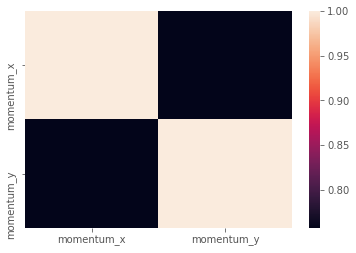

In [19]:
import seaborn as sns
ax=sns.heatmap(corr_date)